In [ ]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
import math
import cmath # números complejos

V_D = 230     # voltaje fase-neutro en delta
V_Y = V_D/math.sqrt(3)     # voltaje fase-neutro en estrella
p  = 6
f  = 50
r1 = 0.045
r2 = 0.054
x1 = 0.29
x2 = 0.28
xm = 9.6

ws = 4*sc.pi*f/p # velocidad de sincronismo

wr = np.arange(0, ws, 0.01) # arreglo de velocidades de rotación con saltos de 0.01 [rad/s]
s = (ws-wr)/ws # deslizamiento

i2_D = np.zeros(len(s))
i2_Y = np.zeros(len(s))

for k in range(len(s)):
  i2_D[k] = V_D/math.sqrt((r1+r2/s[k])**2 +(x1+x2)**2) # módulo de i2 por fase en delta
  i2_Y[k] = V_Y/math.sqrt((r1+r2/s[k])**2 +(x1+x2)**2) # módulo de i2 por fase en estrella

P3mec_D = 3*r2*(1-s)*i2_D**2/s # potencia mecánica trifásica en delta
P3mec_Y = 3*r2*(1-s)*i2_Y**2/s # potencia mecánica trifásica en estrella

tau_D = (3*r2*V_D**2)/(s*ws*((r1+r2/s)**2 + (x1+x2)**2)) # torque en delta
tau_Y = (3*r2*V_Y**2)/(s*ws*((r1+r2/s)**2 + (x1+x2)**2)) # torque en estrella

iphi_D = complex(0,-V_D/xm) # corriente de excitación en cada fase en delta
iphi_Y = complex(0,-V_Y/xm) # corriente de excitación en cada fase en estrella



Rserie = np.zeros(len(s), dtype=np.complex_)
for k in range(len(s)):
  Rserie[k] = complex(r1+r2/s[k], x1+x2) # resistencia equivalente de la rama serie en función del deslizamiento

i2j_D = V_D/Rserie # i2 por fase de forma compleja en delta
i2j_Y = V_Y/Rserie # i2 por fase de forma compleja en delta

itotal_D = (iphi_D + i2j_D)*math.sqrt(3)# corriente total compleja en delta. NOTA: Existieron dudas sobre si usar el sqrt(3) o no. 
itotal_Y = iphi_Y + i2j_Y # corriente total compleja en estrella

S3_D = 3*V_D*itotal_D.conjugate() # potencia aparente trifásica en delta
P3_D = S3_D.real # potencia activa trifásica en delta

S3_Y = 3*V_Y*itotal_Y.conjugate() # potencia aparente trifásica en estrella
P3_Y = S3_Y.real # potencia activa trifásica en estrella

eta_D = P3mec_D/P3_D # eficiencia de motor en estrella
eta_Y = P3mec_Y/P3_Y # eficiencia de motor en delta

rpm = 60*wr/(2*sc.pi) # velocidad de rotación en [rpm]

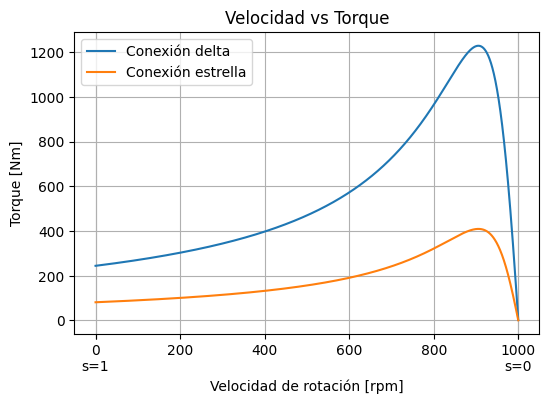

tau_max = 1228.5492393071625
s_tau_max = [0.0944402]
nr_tau_max = [905.5597952]


In [ ]:
# Se grafica Curva de Torque vs. velocidad
plt.figure(dpi=100)
plt.plot(rpm, tau_D, label='Conexión delta')
plt.plot(rpm, tau_Y, label='Conexión estrella')
plt.xlabel('Velocidad de rotación [rpm]')
plt.ylabel('Torque [Nm]')
plt.title('Velocidad vs Torque')
plt.xticks([0, 0, 200,400,600,800,1000,1000], ['0', '\ns=1', '200','400','600','800','1000', '\ns=0'])
plt.legend()
plt.grid()
plt.show()

tau_D_max= np.amax(tau_D)
index = np.where(tau_D == tau_D_max)
print('tau_max =', tau_D_max)
print('s_tau_max =', s[index])
print('nr_tau_max =', rpm[index])

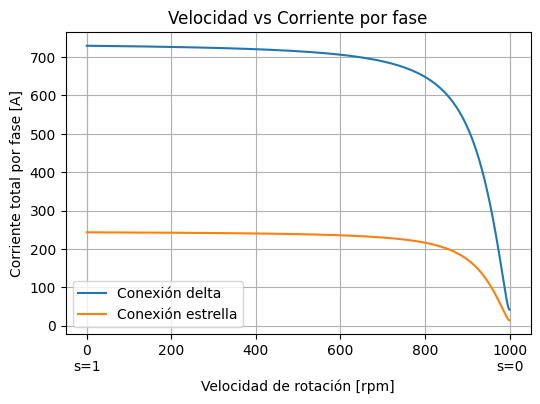

i_total_max = 729.5083283990422
s_i_total_max = [1.]
nr_i_total_max = [0.]


In [ ]:
it_D=abs(itotal_D)
it_Y=abs(itotal_Y)

# Se grafica Curva de Torque vs. velocidad
plt.figure(dpi=100)
plt.plot(rpm, it_D, label='Conexión delta')
plt.plot(rpm, it_Y, label='Conexión estrella')
plt.xlabel('Velocidad de rotación [rpm]')
plt.ylabel('Corriente total por fase [A]')
plt.title('Velocidad vs Corriente por fase')
plt.legend()
plt.grid()
plt.xticks([0, 0, 200,400,600,800,1000,1000], ['0', '\ns=1', '200','400','600','800','1000', '\ns=0'])
plt.show()

it_D_mx= np.amax(it_D)
index = np.where(it_D == it_D_mx)
print('i_total_max =', it_D_mx)
print('s_i_total_max =', s[index])
print('nr_i_total_max =', rpm[index])

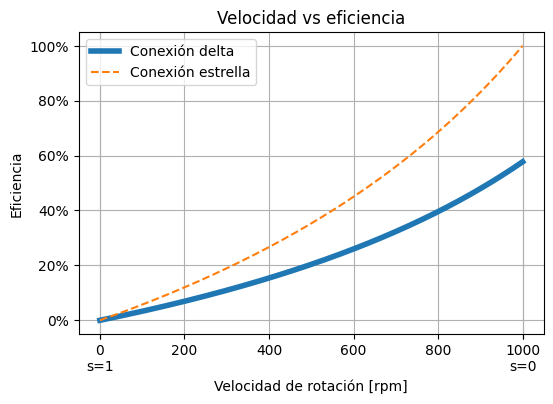

eta_max = 0.5772516750553442
s_eta_max = [9.31545309e-05]
nr_eta_max = [999.90684547]


In [ ]:
# Se grafica Curva de Eficiencia vs. velocidad
plt.figure(dpi=100)
plt.plot(rpm, eta_D, label='Conexión delta', linewidth=4)
plt.plot(rpm, eta_Y, '--',label='Conexión estrella')
plt.xlabel('Velocidad de rotación [rpm]')
plt.ylabel('Eficiencia')
plt.title('Velocidad vs eficiencia')
plt.legend()
plt.grid()
plt.xticks([0, 0, 200,400,600,800,1000,1000], ['0', '\ns=1', '200','400','600','800','1000', '\ns=0'])
plt.yticks([0,0.2,0.4,0.6,0.8,1], ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.show()

n_D= np.amax(eta_D)
index = np.where(eta_D == n_D)
print('eta_max =', n_D)
print('s_eta_max =', s[index])
print('nr_eta_max =', rpm[index])

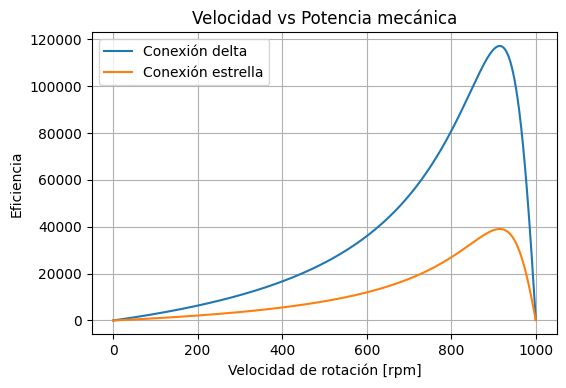

In [ ]:
plt.figure(dpi=100)
plt.plot(rpm, P3mec_D, label='Conexión delta')
plt.plot(rpm, P3mec_Y,label='Conexión estrella')
plt.xlabel('Velocidad de rotación [rpm]')
plt.ylabel('Eficiencia')
plt.title('Velocidad vs Potencia mecánica')
plt.legend()
plt.grid()

plt.show()

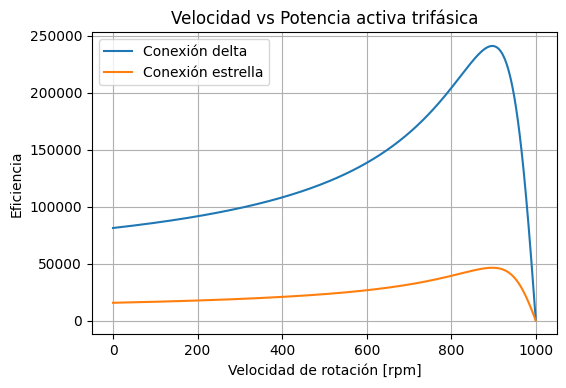

In [ ]:
plt.figure(dpi=100)
plt.plot(rpm, P3_D, label='Conexión delta')
plt.plot(rpm, P3_Y,label='Conexión estrella')
plt.xlabel('Velocidad de rotación [rpm]')
plt.ylabel('Eficiencia')
plt.title('Velocidad vs Potencia activa trifásica')
plt.legend()
plt.grid()

plt.show()

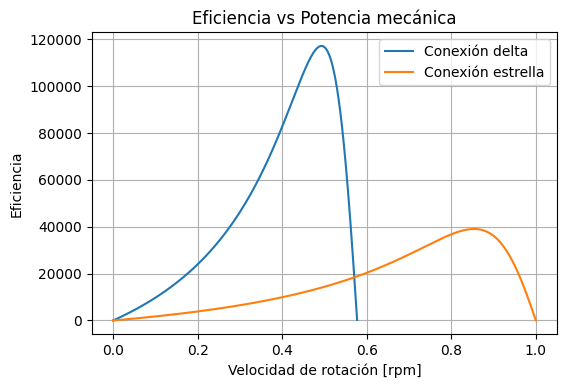

In [ ]:
plt.figure(dpi=100)
plt.plot(eta_D, P3mec_D, label='Conexión delta')
plt.plot(eta_Y, P3mec_Y,label='Conexión estrella')
plt.xlabel('Velocidad de rotación [rpm]')
plt.ylabel('Eficiencia')
plt.title('Eficiencia vs Potencia mecánica')
plt.legend()
plt.grid()

plt.show()

### Corriente de partida  $i_0$
### Torque de partida  $\tau_0$

#### Para conexión $\Delta$:

In [ ]:
print('i_0_D =', it_D[0], '[A]')
print('tau_0_D =', tau_D[0], '[Nm]')

i_0_D = 729.5083283990422 [A]
tau_0_D = 244.50348782506015 [Nm]


#### Para conexión $Y$:

In [ ]:
print('i_0_Y =', it_Y[0], '[A]')
print('tau_0_Y =', tau_Y[0], '[Nm]')

i_0_Y = 243.16944279968078 [A]
tau_0_Y = 81.50116260835341 [Nm]


In [ ]:
k=0
while k!=len(wr):
  if it_D[k] <= it_Y[0]:
    break
  k+=1

print('Corriente de conmutación =', it_D[k], '[A]')
print('Velocidad de conmutación =', rpm[k], '[rpm]')

Corriente de conmutación = 242.9446704777006 [A]
Velocidad de conmutación = 966.6752933515539 [rpm]
0.03332470664844612
